In [21]:
from script import *

In [2]:
facebook = pd.read_csv('facebook.csv')
del facebook['Unnamed: 0']
facebook.columns= ['company','location','job-title','overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars','helpful_count','year']
fields = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
summary_facebook = facebook[fields].describe().transpose()

In [3]:
summary_facebook

,count,mean,std,min,25%,50%,75%,max
overall_ratings,1590.0,4.511950,0.955680,1.0,4.0,5.0,5.0,5.0
work_balance_stars,1590.0,3.927421,1.140055,1.0,3.0,4.0,5.0,5.0
culture_values_stars,1590.0,4.510063,0.941772,1.0,4.5,5.0,5.0,5.0
carrer_opportunities_stars,1590.0,4.358931,0.987425,1.0,4.0,5.0,5.0,5.0
comp_benefit_stars,1590.0,4.560943,0.737593,1.0,4.0,5.0,5.0,5.0
senior_mangemnet_stars,1590.0,4.264843,1.077402,1.0,4.0,5.0,5.0,5.0


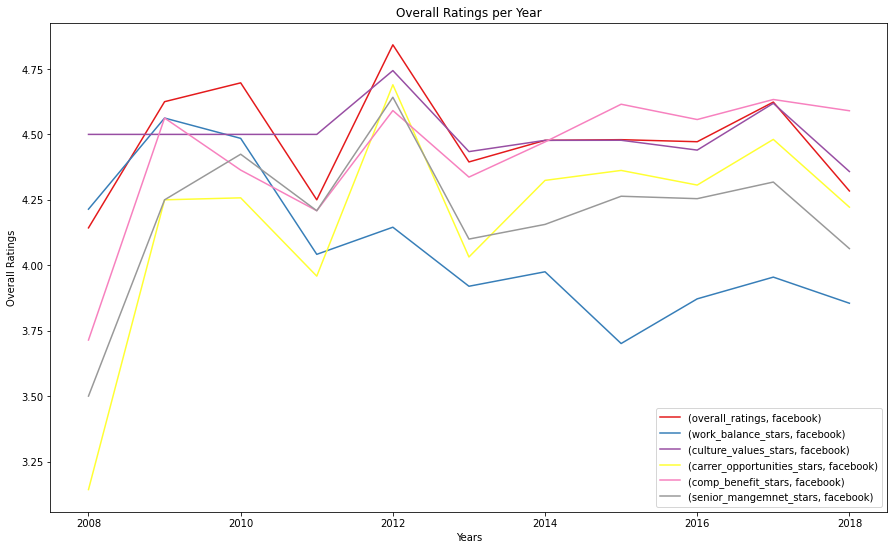

In [4]:
#Ratings over time for Facebook
fig, ax = plt.subplots(figsize=(15,9))
keys = ['year','company']
lines = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
facebook.groupby(keys)[lines].mean().unstack().plot(ax=ax,colormap = 'Set1')
_ = plt.xlabel("Years")
_ = plt.ylabel("Overall Ratings")
_ = plt.title("Overall Ratings per Year")
_ = plt.legend()

In [6]:
corr_fb = corr_matrix(facebook)
corr_fb

,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,Job_code,Locations_code
overall_ratings,1.000000,0.584071,0.767267,0.746212,0.438975,0.750691,-0.166161,-0.223368,0.031748
work_balance_stars,0.584071,1.000000,0.552184,0.496728,0.356884,0.593187,-0.114598,-0.175402,-0.016466
culture_values_stars,0.767267,0.552184,1.000000,0.655536,0.381164,0.720621,-0.133298,-0.209151,-0.019004
carrer_opportunities_stars,0.746212,0.496728,0.655536,1.000000,0.522372,0.680094,-0.129489,-0.136273,0.062168
comp_benefit_stars,0.438975,0.356884,0.381164,0.522372,1.000000,0.467325,-0.038888,-0.038494,0.078558
senior_mangemnet_stars,0.750691,0.593187,0.720621,0.680094,0.467325,1.000000,-0.119486,-0.216996,0.023035
helpful_count,-0.166161,-0.114598,-0.133298,-0.129489,-0.038888,-0.119486,1.000000,0.072661,0.025783
Job_code,-0.223368,-0.175402,-0.209151,-0.136273,-0.038494,-0.216996,0.072661,1.000000,0.103987
Locations_code,0.031748,-0.016466,-0.019004,0.062168,0.078558,0.023035,0.025783,0.103987,1.000000


#### Probabilistic and graphical models

In [7]:
#DA METTERE IN UNA FUNZIONE E PASSARLO NELLO script.py
subset=['work_balance_stars','comp_benefit_stars','senior_mangemnet_stars','carrer_opportunities_stars','culture_values_stars','Job_code','Locations_code']
facebook[subset]=facebook[subset].astype(int)
df_train_test_fb=facebook[['work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']]
df_train_fb = df_train_test_fb.sample(n=len(df_train_test_fb), random_state=1618)[0:int(len(df_train_test_fb)*0.7)]
df_test_fb = df_train_test_fb.sample(n=len(df_train_test_fb), random_state=1618)[int(len(df_train_test_fb)*0.7):]

df_train_fb.head()

,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars
421,4,5,5,4,5
1159,4,4,4,4,4
1507,5,5,5,5,5
889,4,5,5,5,5
1347,5,5,5,5,5


  0%|                                                                            | 6/1000000 [00:00<8:00:08, 34.71it/s]



[('culture_values_stars', 'senior_mangemnet_stars'), ('culture_values_stars', 'carrer_opportunities_stars'), ('culture_values_stars', 'work_balance_stars'), ('carrer_opportunities_stars', 'comp_benefit_stars'), ('senior_mangemnet_stars', 'carrer_opportunities_stars'), ('senior_mangemnet_stars', 'work_balance_stars')]


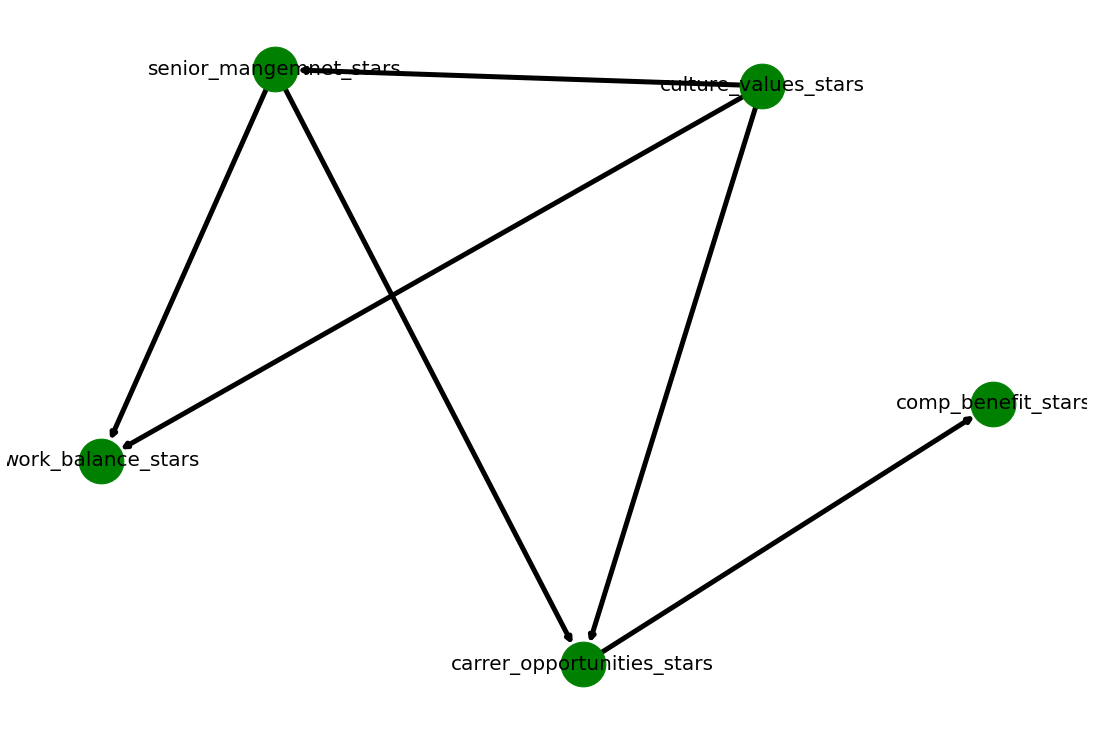

In [8]:
hc = HillClimbSearch(df_train_fb, scoring_method=K2Score(df_train_fb))  #use the training set to build the model
#The score to be optimized during structure estimation.  
#  Supported structure scores: k2score, bdeuscore, bicscore.
best_model = hc.estimate()
print(best_model)
edges = list(best_model.edges())
print(edges)
model = BayesianModel(edges)

%matplotlib inline
plt.figure(figsize=(15,10))


nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000,
        node_color="green", width = 5, font_size = 20)
plt.show()

In [9]:
model.fit(df_train_fb, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

In [10]:
#focus on the relation between culture_values_stars and work_balance
print(infer.query(variables=['work_balance_stars', 'culture_values_stars'], joint= True))

Eliminating: senior_mangemnet_stars: 100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 199.99it/s]

+-------------------------+-----------------------+------------------------------------------------+
| culture_values_stars    | work_balance_stars    |   phi(culture_values_stars,work_balance_stars) |
+=========================+=======================+================================================+
| culture_values_stars(1) | work_balance_stars(1) |                                         0.0189 |
+-------------------------+-----------------------+------------------------------------------------+
| culture_values_stars(1) | work_balance_stars(2) |                                         0.0027 |
+-------------------------+-----------------------+------------------------------------------------+
| culture_values_stars(1) | work_balance_stars(3) |                                         0.0027 |
+-------------------------+-----------------------+------------------------------------------------+
| culture_values_stars(1) | work_balance_stars(4) |                                        

In [11]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'culture_values_stars': i}))


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]

Eliminating: senior_mangemnet_stars: 100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 211.42it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6774 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0968 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.0968 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.1290 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0000 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.2250 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

In [12]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'culture_values_stars': i}))


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]

Eliminating: senior_mangemnet_stars: 100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 214.35it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Eliminating: carrer_opportun

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6774 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0968 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.0968 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.1290 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0000 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.2250 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

In [13]:
causal_graph_facebook = """
digraph {
work_balance_stars;
carrer_opportunities_stars;
comp_benefit_stars;
senior_mangemnet_stars;
carrer_opportunities_stars -> comp_benefit_stars; 
carrer_opportunities_stars -> senior_mangemnet_stars; 

culture_values_stars -> senior_mangemnet_stars;
culture_values_stars -> carrer_opportunities_stars
culture_values_stars -> work_balance_stars

senior_mangemnet_stars -> work_balance_stars;

}
"""

Finding Elimination Order: : 100%|███████████████████████████████████████████████████████| 3/3 [00:20<00:00,  6.85s/it]


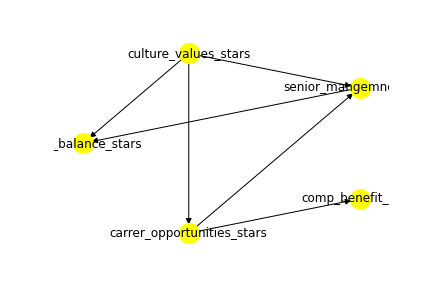

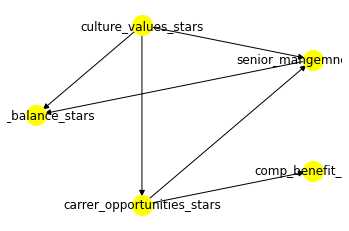

In [14]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='culture_values_stars'

model_fb= CausalModel(
        data = df_test_fb,
        graph=causal_graph_facebook.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_fb.view_model()
display(Image(filename='causal_model.png'))

In [15]:
estimands = model_fb.identify_effect()

In [16]:
estimate = model_fb.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                            
──────────────────────(Expectation(work_balance_stars))
d[cultureᵥₐₗᵤₑₛ ₛₜₐᵣₛ]                                 
Estimand assumption 1, Unconfoundedness: If U→{culture_values_stars} and U→work_balance_stars then P(work_balance_stars|culture_values_stars,,U) = P(work_balance_stars|culture_values_stars,)

## Realized estimand
b: work_balance_stars~culture_values_stars
Target units: ate

## Estimate
Mean value: 0.7005668473575202
p-value: [2.05520577e-42]
95.0% confidence interval: [[0.60947561 0.79165809]]



In [22]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel(mode)

Refute: Add a Random Common Cause
Estimated effect:0.7005668473575202
New effect:0.700503120241943

Refute: Use a subset of data
Estimated effect:0.7005668473575202
New effect:0.7012042189763773
p value:0.47

Refute: Use a Placebo Treatment
Estimated effect:0.7005668473575202
New effect:-0.0002516312760336881
p value:0.48



### Classification

In [23]:
facebook['work_balance']=list(map(lambda x: 1 if x>3.5 else 0,facebook['work_balance_stars']))
facebook['comp_benefit']=list(map(lambda x: 1 if x>3.5 else 0,facebook['comp_benefit_stars']))
facebook.dtypes

company                        object
location                       object
job-title                      object
overall_ratings               float64
work_balance_stars              int32
culture_values_stars            int32
carrer_opportunities_stars      int32
comp_benefit_stars              int32
senior_mangemnet_stars          int32
helpful_count                   int64
year                          float64
Job_code                        int32
Locations_code                  int32
work_balance                    int64
comp_benefit                    int64
dtype: object

In [24]:
fb_jobs=facebook[facebook['Job_code']!=17.0]
fb_jobs['Job_code']=fb_jobs['Job_code'].astype('str')
fb_jobs[['comp_benefit_stars','senior_mangemnet_stars','carrer_opportunities_stars','culture_values_stars']]=fb_jobs[['comp_benefit_stars','senior_mangemnet_stars','carrer_opportunities_stars','culture_values_stars']].astype('int')

X = fb_jobs[['comp_benefit_stars']]
y = fb_jobs['work_balance'].astype('int')

# split X and y into training and testing sets selecting at random the 30% of the rows and assigning them to the test_set
X_train_fb, X_test_fb, y_train_fb, y_test_fb = train_test_split(X, y, test_size=0.30, random_state=42)



<ipython-input-24-a18799d0fca8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_jobs['Job_code']=fb_jobs['Job_code'].astype('str')
c:\users\stefania\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
model_NB=GaussianNB()
model_NB.fit(X_train_fb,y_train_fb)
print(model_NB.score(X_test_fb,y_test_fb))


0.710691823899371


In [ ]:
model_SVC=SVC()
model_SVC.fit(X_train_fb,y_train_fb)
print(model_SVC.score(X_test_fb,y_test_fb))